In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

class BinaryLogisticRegression:
    def fit(self, X, y, alpha, epochs, eps):
        
        X = np.hstack((np.ones([X.shape[0], 1]), X))
        y = np.atleast_2d(y).T
        
        self.theta = np.ones([X.shape[1], 1])
        
        step = 0
        thetagrad = eps + 1
        
        # loop until convergence happens or reach number of steps needed
        while step < epochs and np.linalg.norm(thetagrad) > eps:
            sig = self.sigmoid(X @ self.theta)
            step += 1
            
            # compute the new gradient
            thetagrad = X.T @ (sig - y)
            
            self.theta -= alpha * thetagrad
            
            if step == epochs:
                print('Gradient descent did not converge')
        
    def predict(self, X):
        X = np.hstack((np.ones([X.shape[0], 1]), X))
        
        # calculates y = 1 for each data inputted
        return (self.sigmoid(X @ self.theta) >= 0.5).astype(float)
        
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))

Gradient descent did not converge

Classification Report:

               precision    recall  f1-score   support

           0       0.95      0.65      0.77        54
           1       0.82      0.98      0.89        89

    accuracy                           0.85       143
   macro avg       0.88      0.81      0.83       143
weighted avg       0.87      0.85      0.85       143


Confusion Matrix:



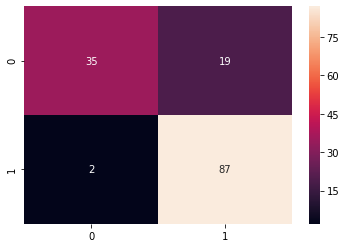

In [13]:
# import the breast cancer dataset
breastcancer = datasets.load_breast_cancer()

# find the data and labels
X = breastcancer.data
Y = breastcancer.target

# split the data into train and test sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)

# build the classifier
model = BinaryLogisticRegression()

# fit the classifier to the training data
model.fit(trainX, trainY, alpha = 0.01, epochs = 1000, eps = 0.01)

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nClassification Report:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)